Import libraries

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px

Load dataset

In [2]:
df = pd.read_csv('car_detail_data.csv')

Look at the first five rows

In [3]:
df.head(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


look at data type

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


check whether there is a missing data or not

In [5]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

check whether there is duplicate data

In [6]:
df.duplicated().sum()

763

If there are 763 duplicate data, means that the actual data is only 3577

In [7]:
df.shape

(4340, 8)

remove duplicate rows and check of we have 3577 data (after removing duplicate data)

In [8]:
df.drop_duplicates(keep="first", ignore_index=True, inplace=True)
df.shape

(3577, 8)

Take column "Name" and create a new column named "brand"

In [9]:
df['brand'] = df.name.apply(lambda x: ' '.join(x.split(' ')[:1]))
df['brand'].value_counts().head(5)

Maruti      1072
Hyundai      637
Mahindra     328
Tata         308
Ford         220
Name: brand, dtype: int64

Plot the "The Most Selling Brands"

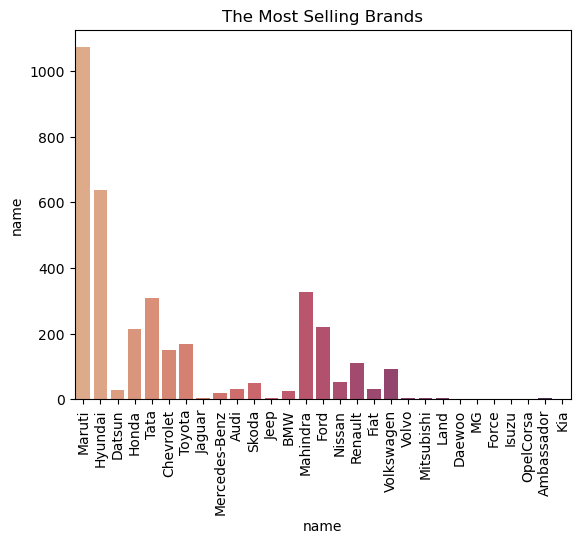

<Figure size 500x500 with 0 Axes>

In [10]:
sns.countplot(data=df,x="brand",palette="flare")
plt.xticks(rotation=90)
plt.xlabel("name",fontsize=10,color="black")
plt.ylabel("name",fontsize=10,color="black")
plt.title("The Most Selling Brands",color="black")
plt.figure(figsize=(5,5))
plt.show()

Using Word Cloud, Brand "Maruti" shows the biggest word in this picture. "Biggest" means the most selling brands

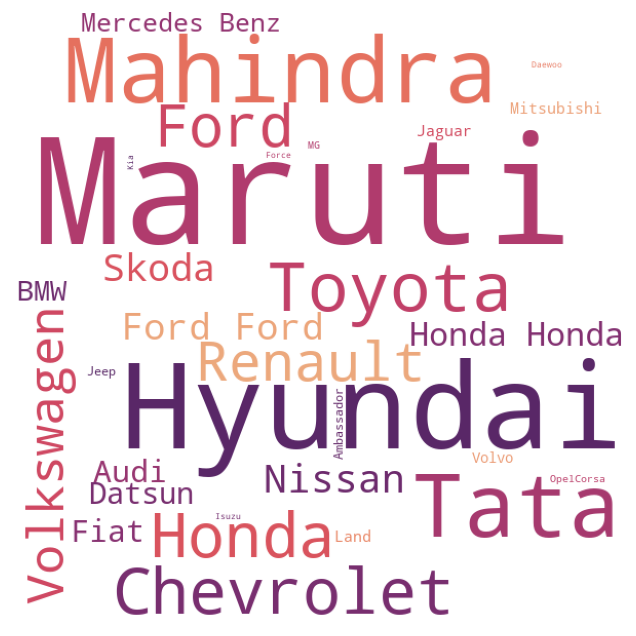

In [11]:
from wordcloud import WordCloud, STOPWORDS

text = ' '.join(df['brand'])

plt.rcParams['figure.figsize'] = (8,8)
wordcloud = WordCloud(background_color = 'white',colormap='flare', 
                      width = 600,  height = 600, 
                      max_words = 100).generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
plt.show()

Based on plot below, the first owner is the highest on the dataset

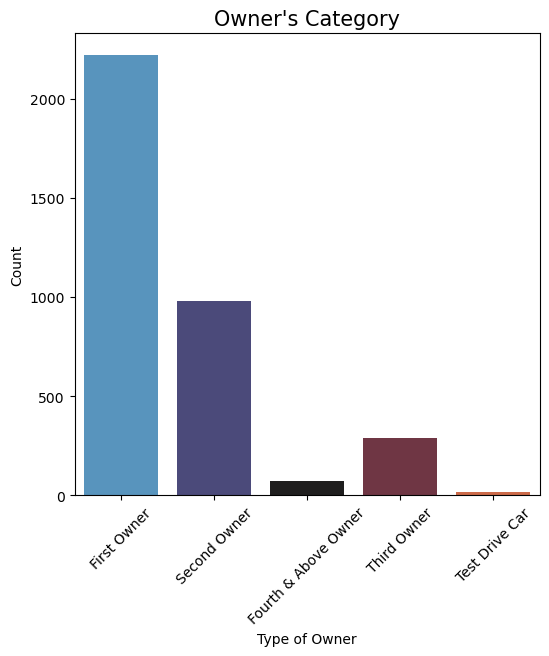

In [12]:
plt.figure(figsize=(6,6))
sns.countplot(data=df,x="owner",palette="icefire")
plt.xticks(rotation=45)
plt.xlabel("Type of Owner",fontsize=10,color="black")
plt.ylabel("Count",fontsize=10,color="black")
plt.title("Owner's Category",fontsize=15,color="black")
plt.show()

From Correlation Matrix below, it can be seen that new car has low kilometer driven and high selling price

/var/folders/nm/r_vj83b11dq8z8kjh48k8xrw0000gn/T/ipykernel_56443/1345519152.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cbar=True, annot=True, cmap='flare')


<Axes: title={'center': 'Correlation Matrix'}>

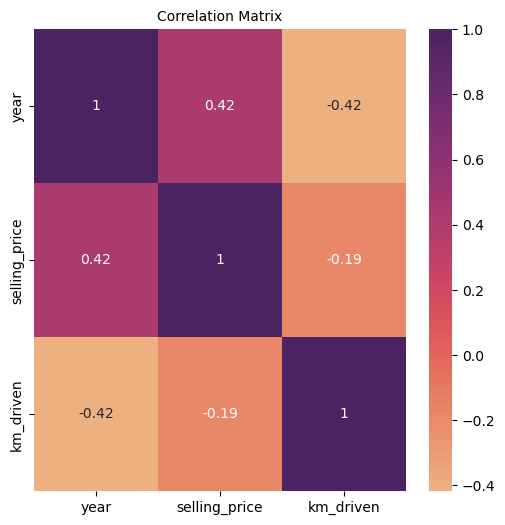

In [13]:
plt.figure(figsize=(6,6))
plt.title('Correlation Matrix', fontsize=10)
sns.heatmap(df.corr(), cbar=True, annot=True, cmap='flare')

The plot belows provides information that the selling price is the highest in between 2015 and 2020

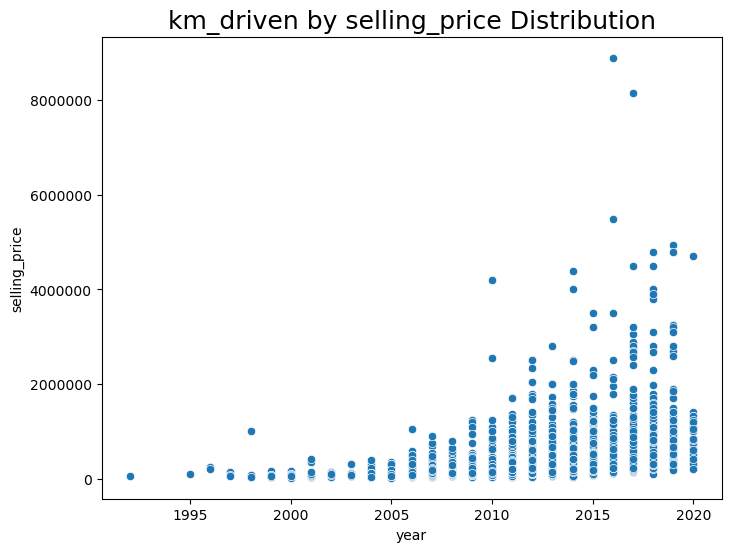

In [14]:
plt.figure(figsize=(8,6))
plt.title('km_driven by selling_price Distribution', fontsize=18)
sns.scatterplot(data=df, y='selling_price', x='year')

plt.ticklabel_format(style='plain', axis='y')

The plots belows show that Diesel, Automatic transmission, first owner and dealer have more 
influence in selling price

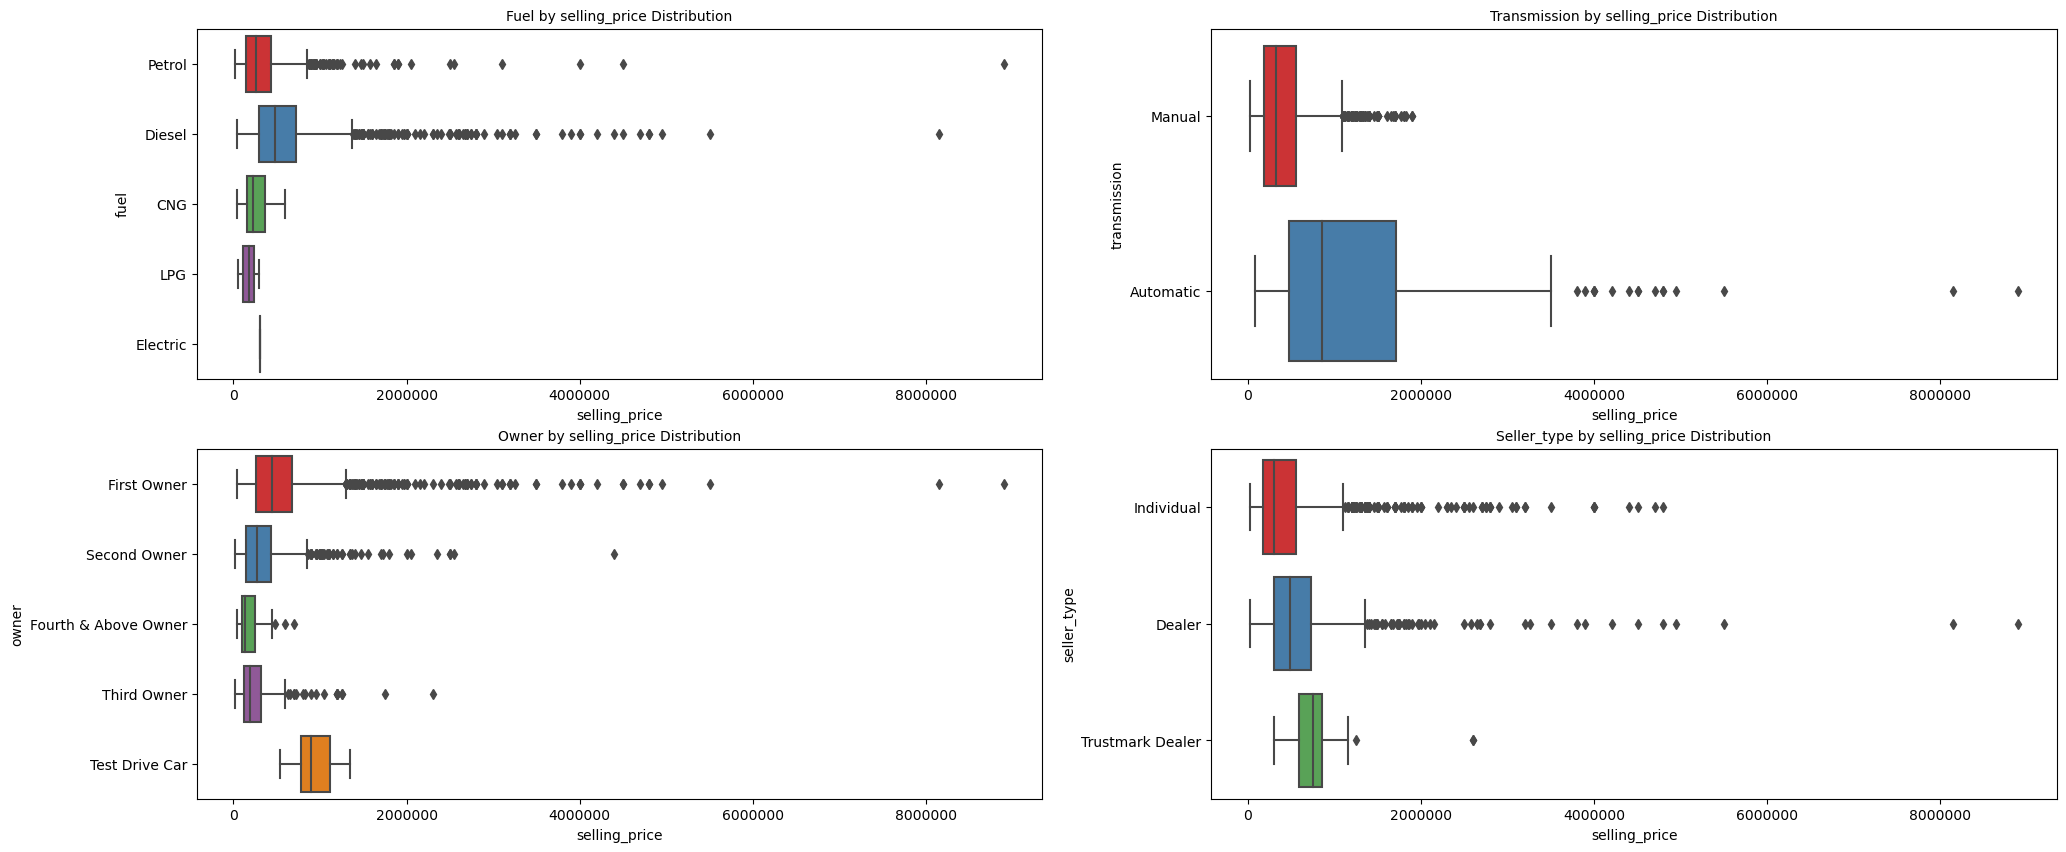

In [15]:
plt.figure(figsize=(24,10))

plt.subplot(2,2,1)
plt.title('Fuel by selling_price Distribution', fontsize=10)
sns.boxplot(data=df, x='selling_price', y='fuel', palette='Set1')
plt.ticklabel_format(style='plain', axis='x')
plt.subplot(2,2,2)
plt.title('Transmission by selling_price Distribution', fontsize=10)
sns.boxplot(data=df, x='selling_price', y='transmission', palette='Set1')
plt.ticklabel_format(style='plain', axis='x')
plt.subplot(2,2,3)
plt.title('Owner by selling_price Distribution', fontsize=10)
sns.boxplot(data=df, x='selling_price', y='owner', palette='Set1')
plt.ticklabel_format(style='plain', axis='x')
plt.subplot(2,2,4)
plt.title('Seller_type by selling_price Distribution', fontsize=10)
sns.boxplot(data=df, x='selling_price', y='seller_type', palette='Set1')
plt.ticklabel_format(style='plain', axis='x')

As can be seen from plot below, Mitsubishi has the most kilometer driven in the dataset

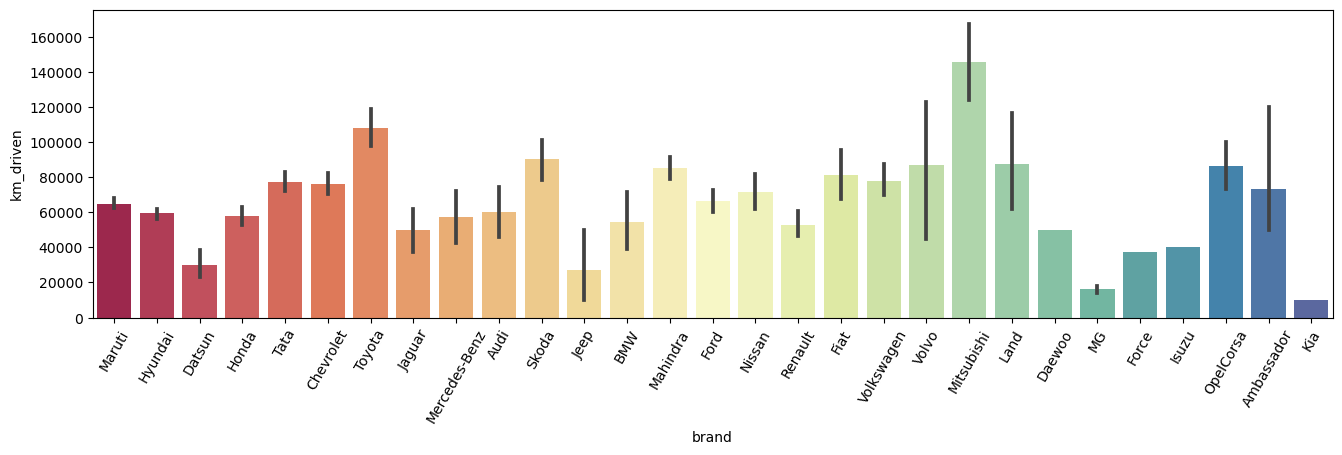

In [16]:
plt.figure(figsize = (16,4))
sns.barplot(x="brand",y="km_driven", data=df, palette = "Spectral");
plt.xticks(rotation = 60)
plt.show()

Picture belows shows that Land has the highest average selling price in the dataset

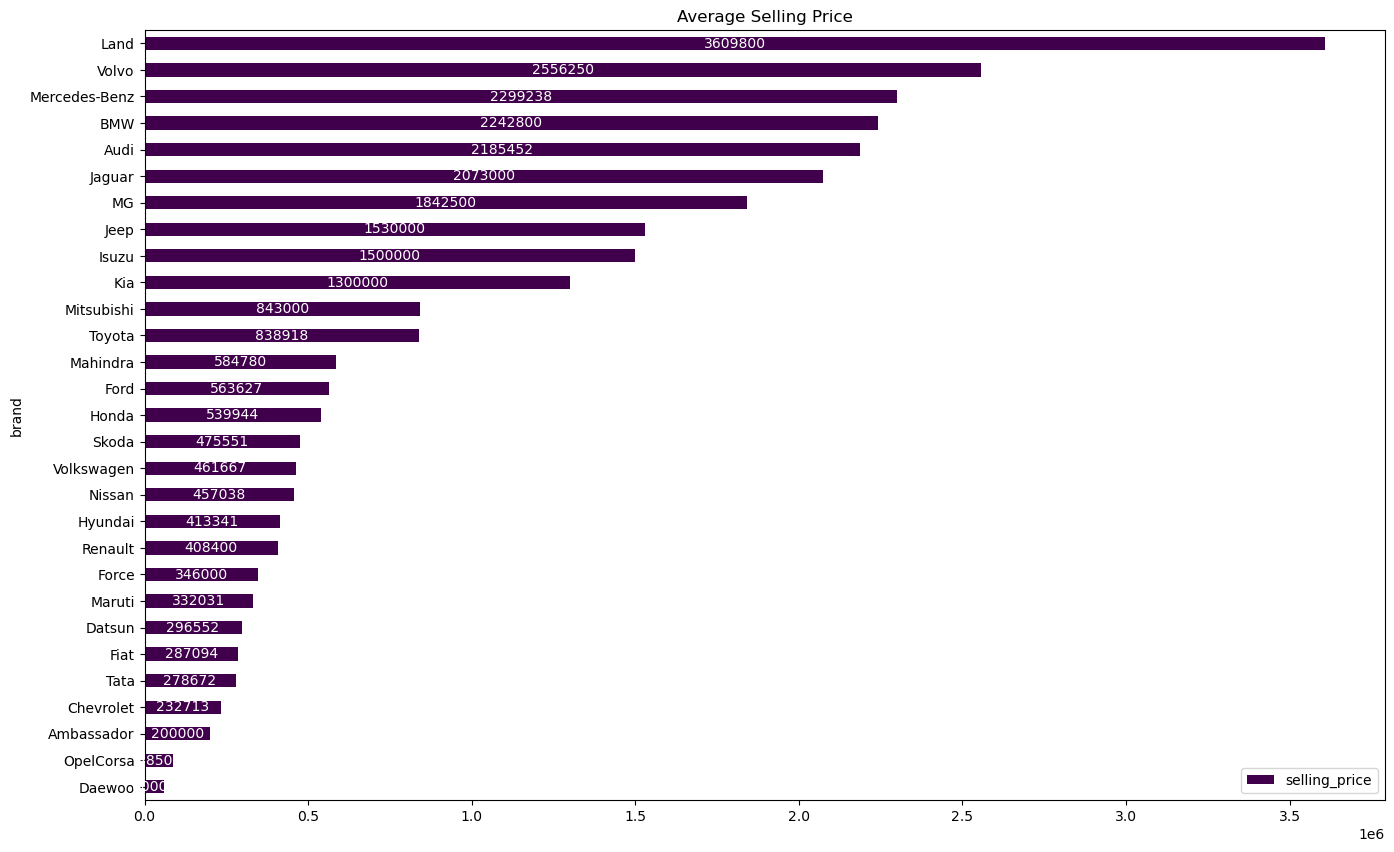

In [17]:
price = df.groupby(['brand'])[['selling_price']].mean()
price.sort_values(by='selling_price', ascending=True, inplace=True)
ax   = price.plot(kind='barh', cmap='PRGn' , figsize=(16,10) ,title= 'Average Selling Price')
for c in ax.containers:
        # set the bar label
    ax.bar_label(c, fmt='%.0f',label_type='center', color='w',rotation=0)